In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/survey_results_public.csv')
df

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,51389,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,Never,100 to 499 employees,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
51389,51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...","Less than half the time, but at least one day ...",10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


In [5]:
columns = [
    'Respondent',
    'Gender',
    'Country',
    'Currency',
    'Salary',
    'EmploymentStatus',
    'Professional',
    'JobSatisfaction',
    'FormalEducation',
    'CompanySize',
    'CompanyType',
    'HaveWorkedLanguage',
    'WantWorkLanguage'
]

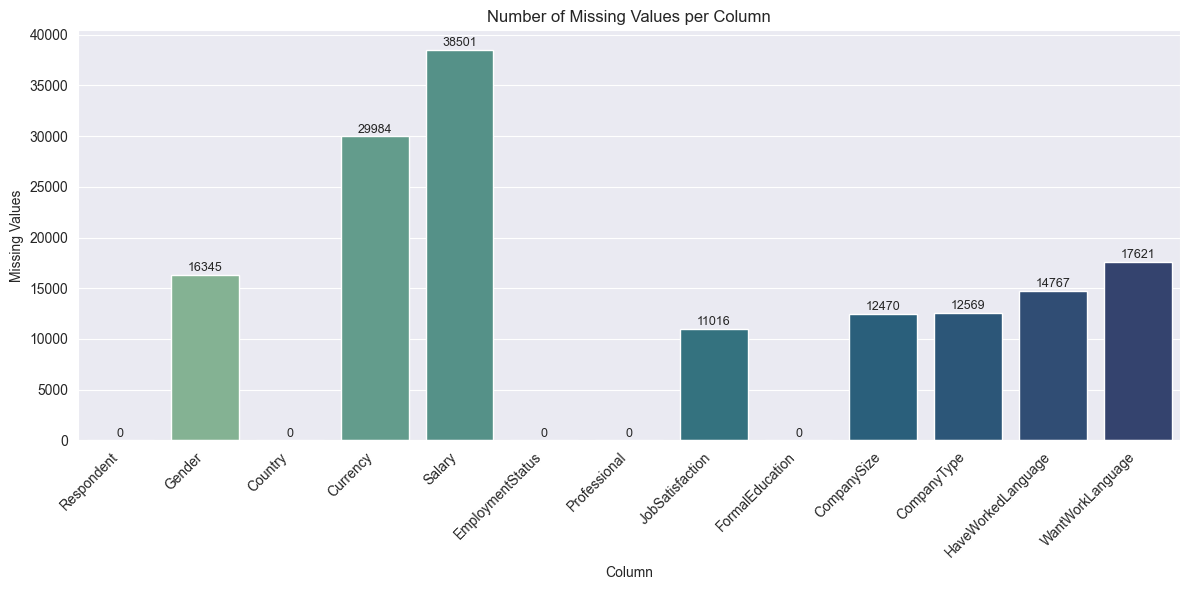

,Column,Number of missing values,Percentage (%) of missing values
0,Respondent,0,0.00
1,Gender,16345,31.80
2,Country,0,0.00
3,Currency,29984,58.34
4,Salary,38501,74.92
5,EmploymentStatus,0,0.00
6,Professional,0,0.00
7,JobSatisfaction,11016,21.44
8,FormalEducation,0,0.00
9,CompanySize,12470,24.26


In [28]:
# MISSING DATA
missing_data = df[columns].isnull().sum().to_frame(name='Number of missing values')
missing_data['Percentage (%) of missing values'] = (df[columns].isnull().mean() * 100).round(2)

missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Column',
    y='Number of missing values',
    hue='Column',
    data=missing_data,
    palette='crest',
    legend=False
)

for index, row in missing_data.iterrows():
    plt.text(index, row['Number of missing values'] + 50, str(row['Number of missing values']), ha='center', va='bottom', fontsize=9)

plt.title('Number of Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

missing_data

In [34]:
# MISSING DATA
df_clean = df[df['Country'].notnull()]

salary_by_country = df_clean.groupby('Country')['Salary'].agg(
    Number_of_valid_answers='count',
    Number_of_missing_values=lambda x: x.isnull().sum()
)

salary_by_country['Number_of_values'] = df_clean.groupby('Country')['Salary'].size()

salary_by_country['Percentage_of_missing_values (Salary)'] = (salary_by_country['Number_of_missing_values'] / salary_by_country['Number_of_values'] * 100).round(2)

salary_by_country = salary_by_country.sort_values(by='Number_of_values', ascending=False)

salary_by_country[['Number_of_values', 'Percentage_of_missing_values (Salary)']].head(10)

,Number_of_values,Percentage_of_missing_values (Salary)
Country,,
United States,11455,66.99
India,5197,84.20
United Kingdom,4395,68.46
Germany,4143,76.01
Canada,2233,70.13
France,1740,72.59
Poland,1290,75.43
Australia,913,71.96
Russian Federation,873,77.32


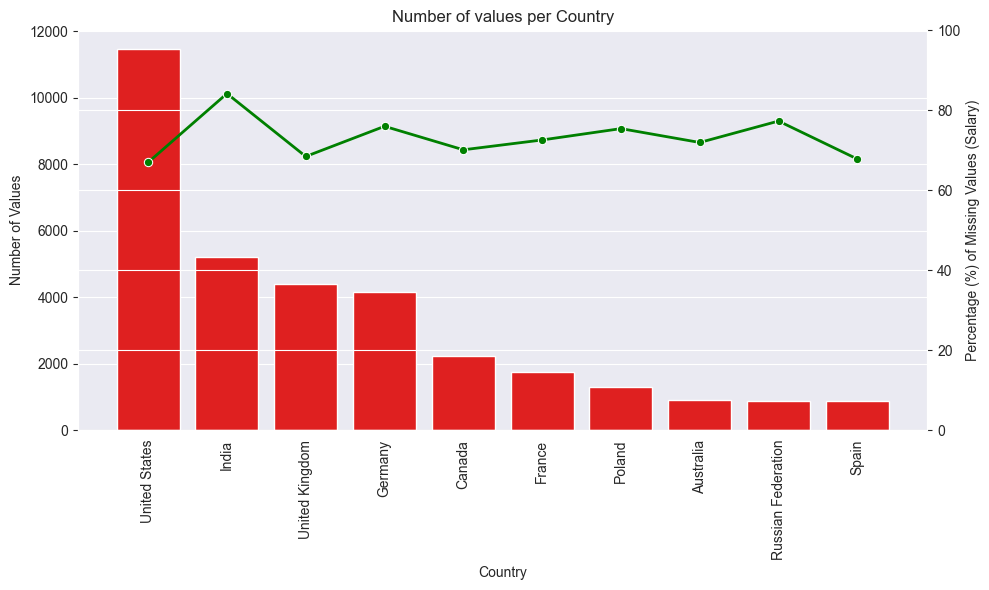

In [38]:
# MISSING DATA
fig, axis_1 = plt.subplots(figsize=(10, 6))

data = salary_by_country.head(10)

sns.barplot(x=data.index, y='Number_of_values', data=data, ax=axis_1, color='red')
axis_1.set_xlabel('Country')
axis_1.set_ylabel('Number of Values')
axis_1.set_title('Number of values per Country')

axis_2 = axis_1.twinx()
sns.lineplot(x=data.index, y='Percentage_of_missing_values (Salary)', data=data, ax=axis_2, color='green', marker='o', linewidth=2)
axis_2.set_ylabel('Percentage (%) of Missing Values (Salary)')
axis_2.set_ylim(0, 100)

axis_1.set_xticks(range(len(data)))
axis_1.set_xticklabels(axis_1.get_xticklabels(), rotation=90, ha="center")

plt.tight_layout()
plt.show()


In [39]:
# MISSING DATA
df_clean = df[df['Country'].notnull()]

job_satisfaction_by_country = df_clean.groupby('Country')['JobSatisfaction'].agg(
    Number_of_valid_answers='count',
    Number_of_missing_values=lambda x: x.isnull().sum()
)

job_satisfaction_by_country['Number_of_values'] = df_clean.groupby('Country')['JobSatisfaction'].size()

job_satisfaction_by_country['Percentage_of_missing_values (Job_Satisfaction)'] = (
    job_satisfaction_by_country['Number_of_missing_values'] / job_satisfaction_by_country['Number_of_values'] * 100
).round(2)

job_satisfaction_by_country = job_satisfaction_by_country.sort_values(by='Number_of_values', ascending=False)

job_satisfaction_by_country[['Number_of_values', 'Percentage_of_missing_values (Job_Satisfaction)']].head(10)


,Number_of_values,Percentage_of_missing_values (Job_Satisfaction)
Country,,
United States,11455,18.62
India,5197,27.07
United Kingdom,4395,16.79
Germany,4143,23.22
Canada,2233,22.08
France,1740,22.93
Poland,1290,18.22
Australia,913,19.28
Russian Federation,873,17.53


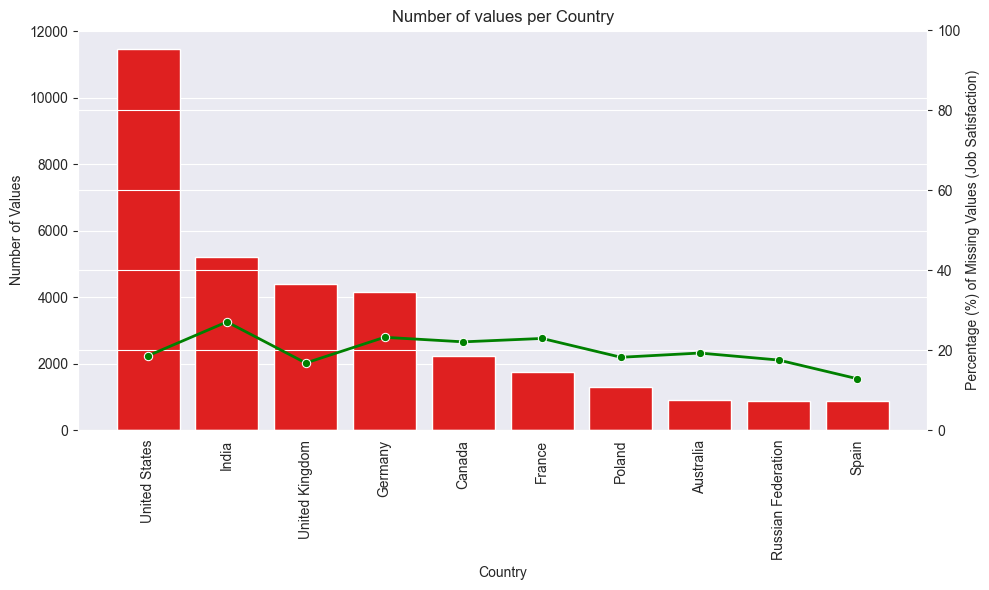

In [41]:
# MISSING DATA
fig, axis_1 = plt.subplots(figsize=(10, 6))

data = job_satisfaction_by_country.head(10)

sns.barplot(x=data.index, y='Number_of_values', data=data, ax=axis_1, color='red')
axis_1.set_xlabel('Country')
axis_1.set_ylabel('Number of Values')
axis_1.set_title('Number of values per Country')

axis_2 = axis_1.twinx()
sns.lineplot(x=data.index, y='Percentage_of_missing_values (Job_Satisfaction)', data=data, ax=axis_2, color='green', marker='o', linewidth=2)
axis_2.set_ylabel('Percentage (%) of Missing Values (Job Satisfaction)')
axis_2.set_ylim(0, 100)

axis_1.set_xticks(range(len(data)))
axis_1.set_xticklabels(axis_1.get_xticklabels(), rotation=90, ha="center")

plt.tight_layout()
plt.show()


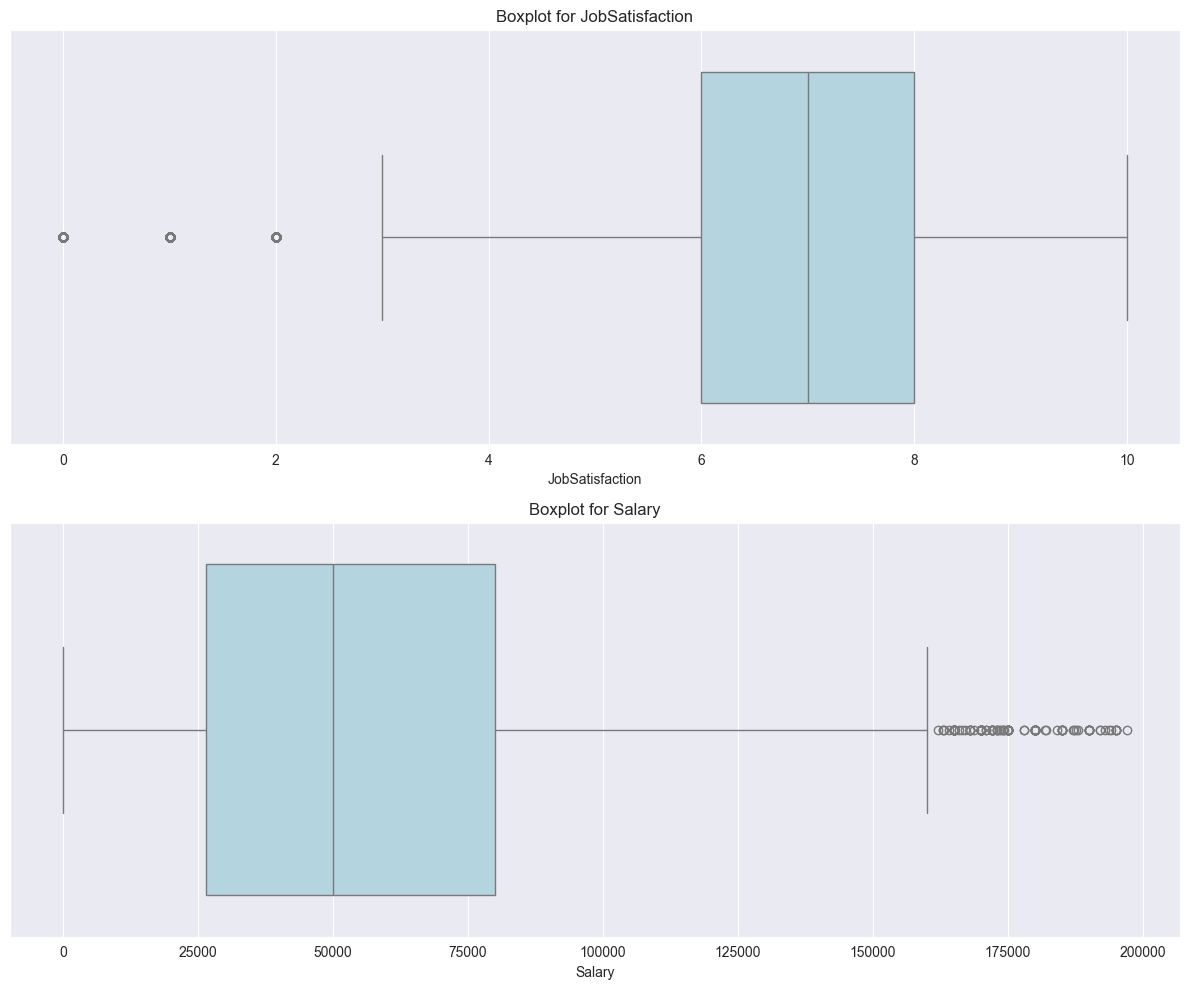

,Column,Number of Outliers,Total non-null values
0,JobSatisfaction,1728,40376
1,Salary,157,12891


In [49]:
# OUTLIERS
columns_numeric = {
    'Salary',
    'JobSatisfaction',
}

number_of_outliers = {}

number_of_values = {}

plt.figure(figsize=(12, 5 * len(columns_numeric)))

for index, column in enumerate(columns_numeric, 1):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    number_of_outliers[column] = outliers.shape[0]
    number_of_values[column] = df[column].notnull().sum()

    plt.subplot(len(columns_numeric), 1, index)
    sns.boxplot(x=df[column], color='lightblue')
    plt.title(f'Boxplot for {column}')

outliers_df = pd.DataFrame({
    'Column': list(columns_numeric),
    'Number of Outliers': [number_of_outliers[col] for col in columns_numeric],
    'Total non-null values': [number_of_values[col] for col in columns_numeric]
})

plt.tight_layout()
plt.show()
outliers_df


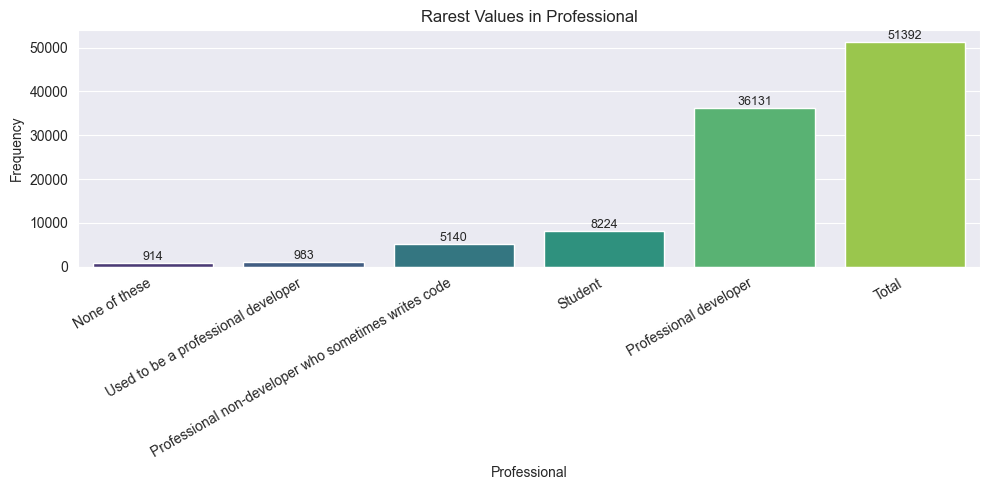

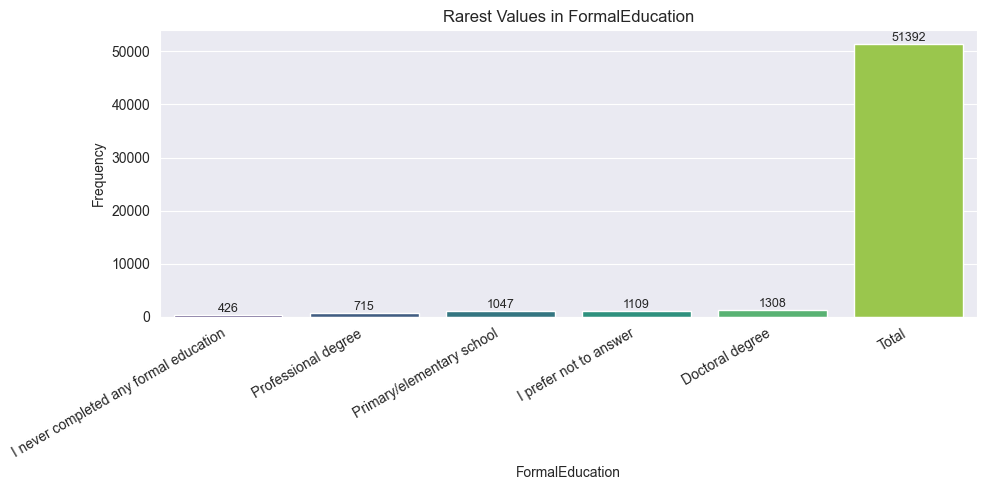

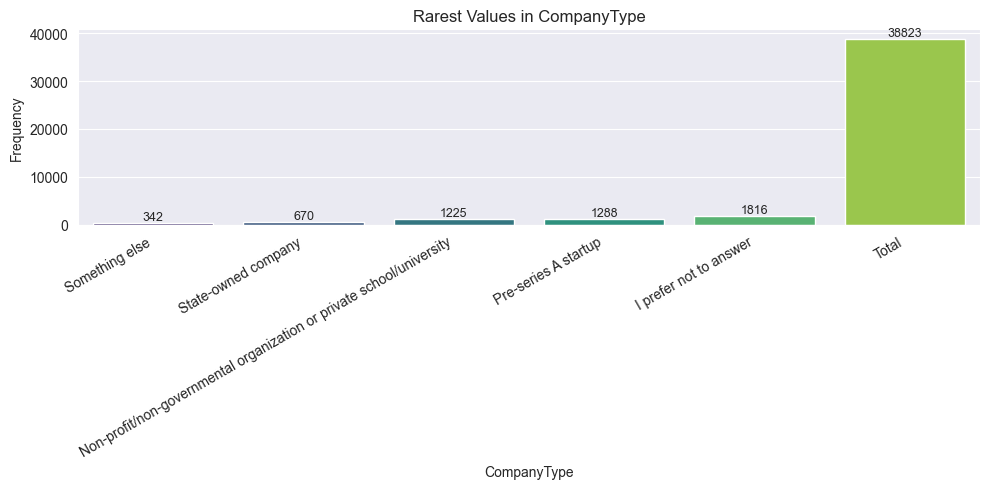

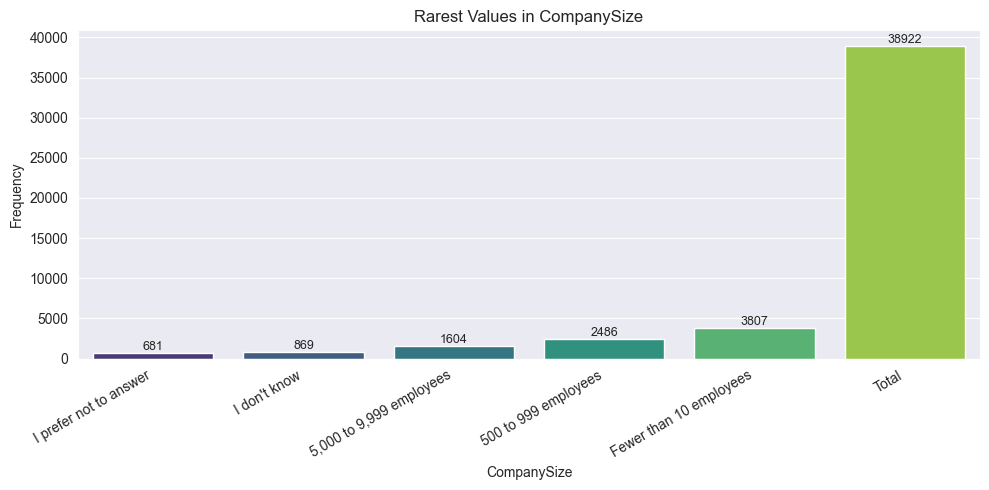

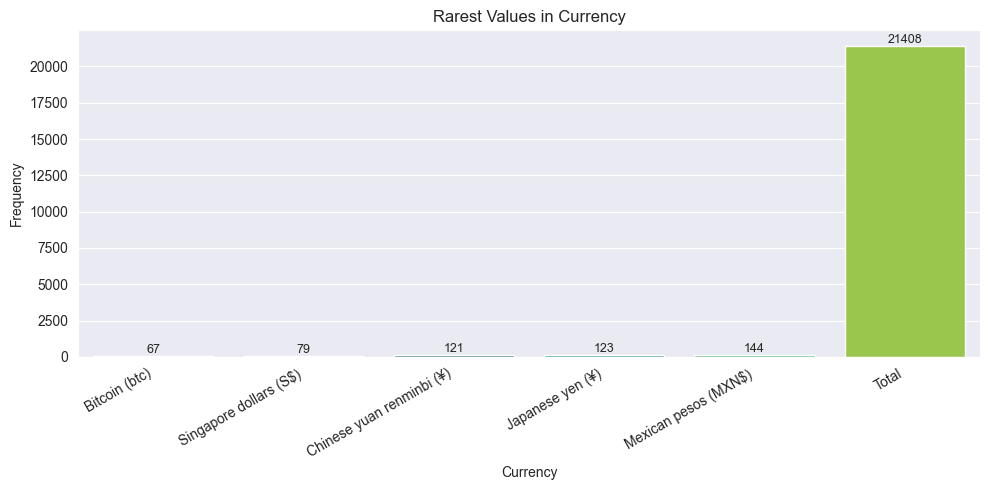

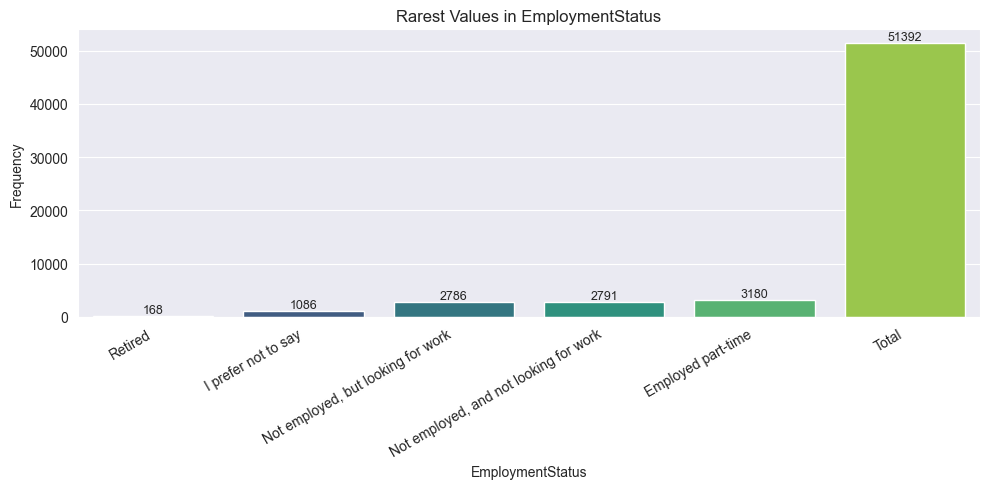

In [50]:
# OUTLIERS
columns_non_numeric = {
    'Currency',
    'EmploymentStatus',
    'Professional',
    'FormalEducation',
    'CompanySize',
    'CompanyType'
}

for column in columns_non_numeric:
    if column in df.columns:
        if not pd.api.types.is_numeric_dtype(df[column]):
            value_counts = df[column].value_counts(ascending=True).head(5)

            total_count = df[column].count()
            value_counts['Total'] = total_count

            plt.figure(figsize=(10, 5))
            axis = sns.barplot(
                x=value_counts.index.astype(str),
                y=value_counts.values,
                hue=value_counts.index.astype(str),
                palette='viridis',
                legend=False
            )

            for i, val in enumerate(value_counts.values):
                axis.text(i, val + 0.5, str(val), ha='center', va='bottom', fontsize=9)

            plt.title(f'Rarest Values in {column}')
            plt.xlabel(f'{column}')
            plt.ylabel('Frequency')
            plt.xticks(rotation=30, ha='right')
            plt.tight_layout()
            plt.show()

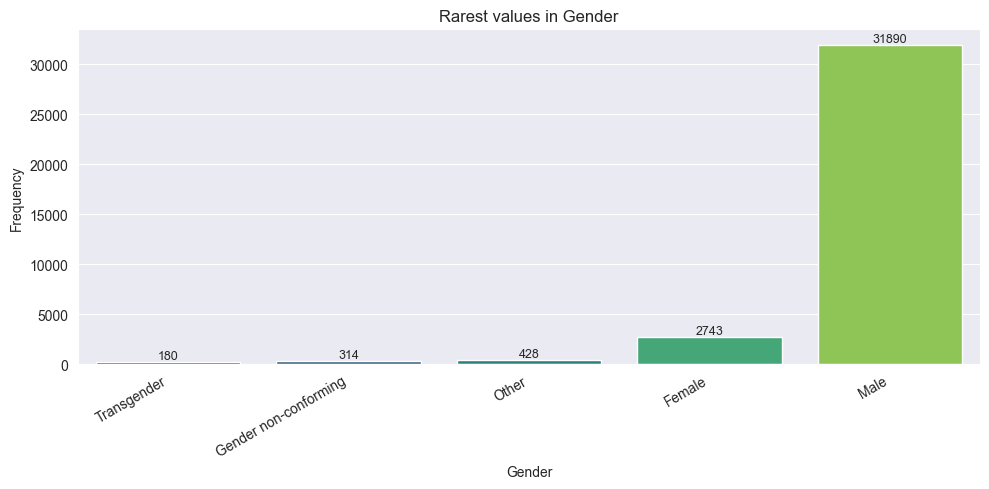

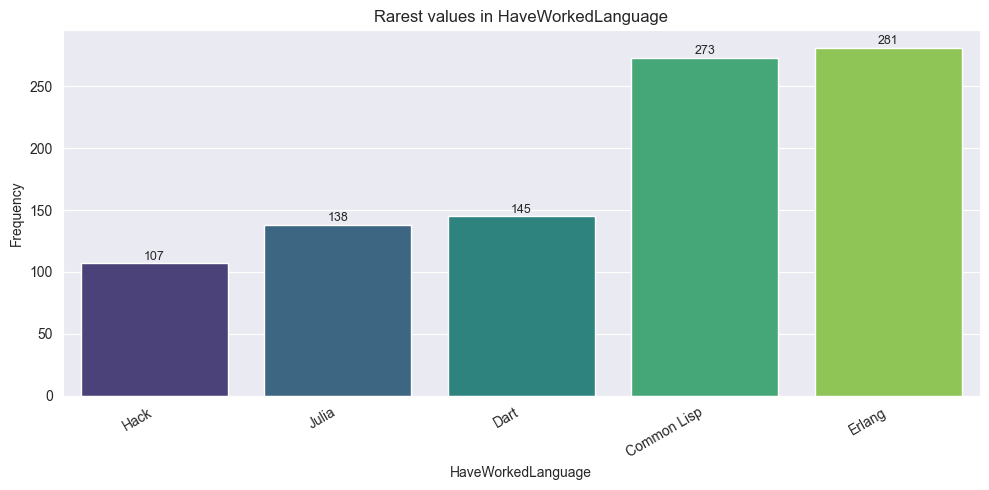

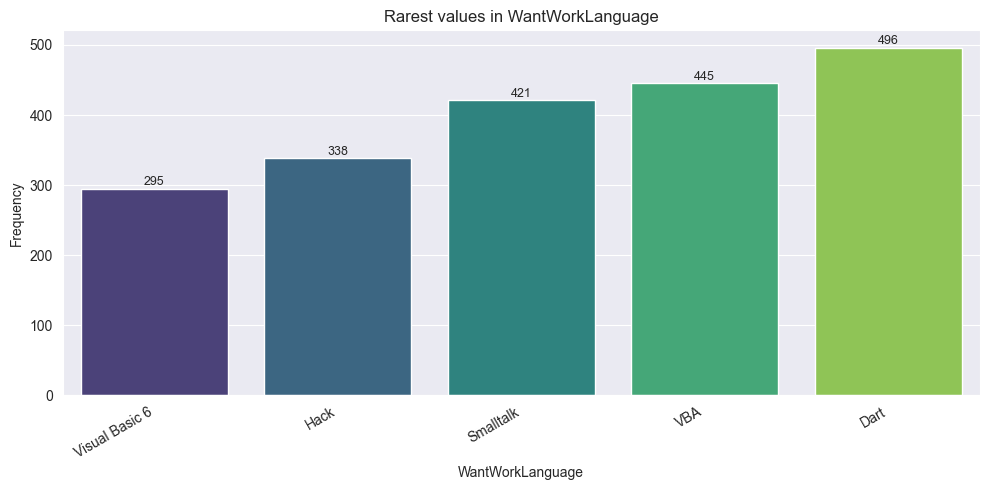

In [53]:
# OUTLIERS
multi_choice_columns = [
    'Gender',
    'HaveWorkedLanguage',
    'WantWorkLanguage'
]

for column in multi_choice_columns:
    if column in df.columns:
        split_series = df[column].dropna().str.split(';')

        all_choices = split_series.explode().str.strip()

        value_counts = all_choices.value_counts(ascending=True).head(5)

        plt.figure(figsize=(10, 5))
        axis = sns.barplot(
            x=value_counts.index,
            y=value_counts.values,
            hue=value_counts.index,
            palette='viridis',
            legend=False
        )

        for i, val in enumerate(value_counts.values):
            axis.text(i, val + 0.5, str(val), ha='center', va='bottom', fontsize=9)

        plt.title(f'Rarest values in {column}')
        plt.xlabel(f'{column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=30, ha='right')
        plt.tight_layout()
        plt.show()

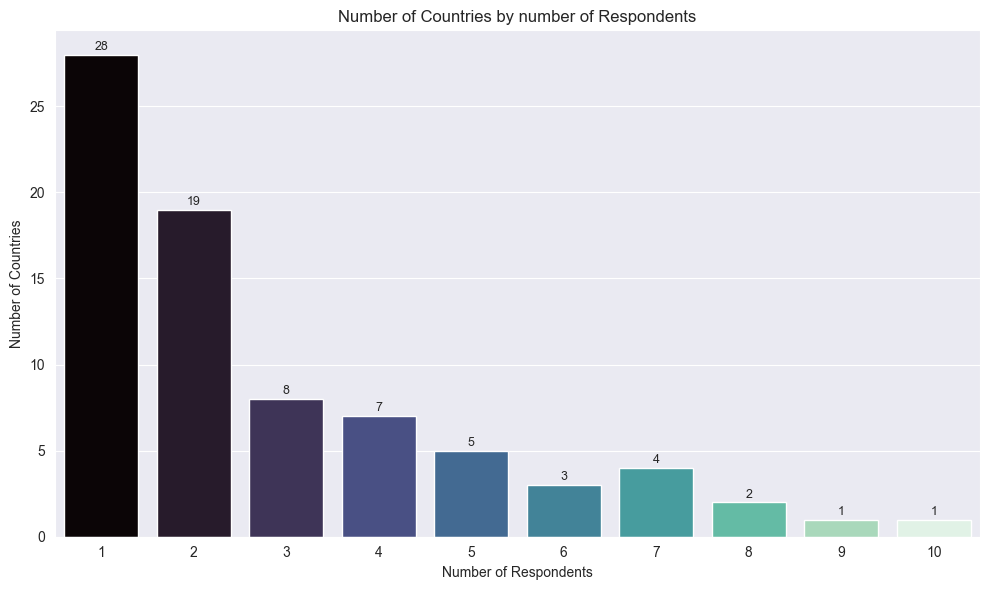

In [55]:
# OUTLIERS
number_of_respondents_per_country = df['Country'].value_counts(ascending=True)

number_of_respondents_per_country_df = number_of_respondents_per_country.reset_index()
number_of_respondents_per_country_df.columns = ['Country', 'Number of Respondents']

respondent_distribution = number_of_respondents_per_country.value_counts().sort_index().head(10)

respondent_distribution_df = pd.DataFrame({
    'Number of respondents': respondent_distribution.index,
    'Number of countries': respondent_distribution.values
})

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Number of respondents',
    y='Number of countries',
    data=respondent_distribution_df,
    hue='Number of respondents',
    palette='mako',
    legend=False
)

for index, row in respondent_distribution_df.iterrows():
    plt.text(index, row['Number of countries'] + 0.1, str(row['Number of countries']),
             ha='center', va='bottom', fontsize=9)

plt.title('Number of Countries by number of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

In [56]:
# OVERALL DATA INTEGRITY
number_of_respondents = df.shape[0]
number_of_unique_respondents = df['Respondent'].nunique()
number_of_duplicated_respondents = df['Respondent'].duplicated().sum()

print(f"Total rows: {number_of_respondents}")
print(f"Unique Respondents: {number_of_unique_respondents}")
print(f"Duplicated Respondents: {number_of_duplicated_respondents}")

Total rows: 51392
Unique Respondents: 51392
Duplicated Respondents: 0


In [57]:
# OVERALL DATA INTEGRITY
unique_gender_values = (
    df['Gender']
    .dropna()
    .str.split(';')
    .explode()
    .str.strip()
    .dropna()
    .unique()
)

gender_df = pd.DataFrame(sorted(unique_gender_values), columns=['Individual Gender Categories'])

gender_df.reset_index(drop=True, inplace=True)

gender_df


,Individual Gender Categories
0,Female
1,Gender non-conforming
2,Male
3,Other
4,Transgender


In [58]:
# OVERALL DATA INTEGRITY
unique_country_values = df['Country'].dropna().unique()

country_df = pd.DataFrame(unique_country_values, columns=['Country Categories'])

country_df.reset_index(drop=True, inplace=True)

country_df

,Country Categories
0,United States
1,United Kingdom
2,Switzerland
3,New Zealand
4,Poland
...,...
196,Montserrat
197,Christmas Island
198,Heard and McDonald Islands
199,Comoros


In [59]:
# OVERALL DATA INTEGRITY
unique_currency_values = df['Currency'].dropna().unique()

currency_df = pd.DataFrame(unique_currency_values, columns=['Currency Categories'])

currency_df.reset_index(drop=True, inplace=True)

currency_df

,Currency Categories
0,British pounds sterling (£)
1,Canadian dollars (C$)
2,U.S. dollars ($)
3,Euros (€)
4,Brazilian reais (R$)
5,Indian rupees (?)
6,Polish zloty (zl)
7,Swedish kroner (SEK)
8,Russian rubles (?)
9,Swiss francs


In [60]:
# OVERALL DATA INTEGRITY
unique_employment_status_values = df['EmploymentStatus'].dropna().unique()

employment_status_df = pd.DataFrame(unique_employment_status_values, columns=['EmploymentStatus Categories'])

employment_status_df.reset_index(drop=True, inplace=True)

employment_status_df

,EmploymentStatus Categories
0,"Not employed, and not looking for work"
1,Employed part-time
2,Employed full-time
3,"Independent contractor, freelancer, or self-em..."
4,"Not employed, but looking for work"
5,I prefer not to say
6,Retired


In [61]:
# OVERALL DATA INTEGRITY
unique_professional_values = df['Professional'].dropna().unique()

professional_df = pd.DataFrame(unique_professional_values, columns=['Professional Categories'])

professional_df

,Professional Categories
0,Student
1,Professional developer
2,Professional non-developer who sometimes write...
3,Used to be a professional developer
4,None of these


In [62]:
# OVERALL DATA INTEGRITY
unique_job_satisfaction_values = df['JobSatisfaction'].dropna().unique()

job_satisfaction_df = pd.DataFrame(unique_job_satisfaction_values, columns=['JobSatisfaction Categories'])

job_satisfaction_df.sort_values(by='JobSatisfaction Categories', inplace=True)
job_satisfaction_df.reset_index(drop=True, inplace=True)

job_satisfaction_df

,JobSatisfaction Categories
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0
9,9.0


In [63]:
# OVERALL DATA INTEGRITY
unique_formal_education_values = df['FormalEducation'].dropna().unique()

formal_education_df = pd.DataFrame(unique_formal_education_values, columns=['FormalEducation Categories'])

formal_education_df.reset_index(drop=True, inplace=True)

formal_education_df

,FormalEducation Categories
0,Secondary school
1,Some college/university study without earning ...
2,Bachelor's degree
3,Doctoral degree
4,Master's degree
5,Professional degree
6,Primary/elementary school
7,I prefer not to answer
8,I never completed any formal education


In [64]:
# OVERALL DATA INTEGRITY
unique_company_size_values = df['CompanySize'].dropna().unique()

company_size_df = pd.DataFrame(unique_company_size_values, columns=['Company Size Categories'])

company_size_df.reset_index(drop=True, inplace=True)

company_size_df

,Company Size Categories
0,20 to 99 employees
1,"10,000 or more employees"
2,10 to 19 employees
3,Fewer than 10 employees
4,"5,000 to 9,999 employees"
5,100 to 499 employees
6,"1,000 to 4,999 employees"
7,500 to 999 employees
8,I don't know
9,I prefer not to answer


In [65]:
# OVERALL DATA INTEGRITY
unique_company_type_values = df['CompanyType'].dropna().unique()

company_type_df = pd.DataFrame(unique_company_type_values, columns=['Company Type Categories'])

company_type_df.reset_index(drop=True, inplace=True)

company_type_df

,Company Type Categories
0,"Privately-held limited company, not in startup..."
1,Publicly-traded corporation
2,Non-profit/non-governmental organization or pr...
3,Government agency or public school/university
4,Pre-series A startup
5,Venture-funded startup
6,I don't know
7,"Sole proprietorship or partnership, not in sta..."
8,I prefer not to answer
9,State-owned company


In [66]:
# OVERALL DATA INTEGRITY
individual_languages = (
    df['HaveWorkedLanguage']
    .dropna()
    .str.split(';')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
)

individual_languages.columns = ['Language', 'Count']

individual_languages

,Language,Count
0,JavaScript,22875
1,SQL,18754
2,Java,14524
3,C#,12476
4,Python,11704
5,PHP,10290
6,C++,8155
7,C,6974
8,TypeScript,3488
9,Ruby,3324


In [67]:
# OVERALL DATA INTEGRITY
individual_wanted_languages = (
    df['WantWorkLanguage']
    .dropna()
    .str.split(';')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
)

individual_wanted_languages.columns = ['Language', 'Count']

individual_wanted_languages

,Language,Count
0,JavaScript,16327
1,Python,12570
2,SQL,11217
3,C#,10187
4,Java,9988
5,C++,7647
6,Go,5770
7,TypeScript,5692
8,PHP,5365
9,C,4841


In [73]:
# OVERALL DATA INTEGRITY
negative_salaries = df[df['Salary'] < 0]

zero_salaries = df[df['Salary'] == 0]

threshold = 200000
large_salaries = df[df['Salary'] > threshold]

suspicious_salaries = pd.concat([negative_salaries, zero_salaries, large_salaries])

suspicious_salaries[['Salary', 'Country', 'JobSatisfaction', 'Professional']].sort_values(by='Salary', ascending=False)


,Salary,Country,JobSatisfaction,Professional
2951,0.0,India,10.0,Professional developer
4517,0.0,India,8.0,Professional developer
23907,0.0,Sweden,7.0,Professional developer
23953,0.0,Colombia,9.0,Professional developer
44841,0.0,Japan,8.0,Professional developer
51144,0.0,Australia,4.0,Professional developer


In [72]:
# OVERALL DATA INTEGRITY & VALUES OF UNKNOWN MEANING
low_salary_entries = df[(df['Salary'] < 5000) & (df['Salary'] > 0)]

unique_low_salaries_sorted = low_salary_entries[['Salary', 'Currency', 'Country', 'JobSatisfaction', 'Professional']].sort_values(by='Salary', ascending=True)

unique_low_salaries_sorted

,Salary,Currency,Country,JobSatisfaction,Professional
9082,0.014682,Indian rupees (?),India,6.0,Professional developer
23414,0.029364,Indian rupees (?),India,10.0,Professional developer
9133,0.044046,Indian rupees (?),India,8.0,Professional developer
29459,0.044046,Indian rupees (?),India,3.0,Professional developer
30627,0.044046,Indian rupees (?),India,5.0,Professional developer
...,...,...,...,...,...
48968,4968.152866,Brazilian reais (R$),Brazil,2.0,Professional developer
45289,4991.924827,Indian rupees (?),India,3.0,Professional developer
48226,4991.924827,Indian rupees (?),India,2.0,Professional developer
33401,4991.924827,Indian rupees (?),India,4.0,Professional developer
